In [1]:
import pandas as pd
import numpy as np

In [2]:
pred = pd.read_csv('predictors.csv')

In [3]:
msf = pd.read_csv('msf.csv')

In [4]:
# shift the return so that we have the future return to predict
msf['ret'] = msf.groupby(['permno']).ret.shift(-1)

In [5]:
df = pred.merge(msf).query('yyyymm>200000').dropna(subset=['ret'])

In [6]:
from pycaret.regression import *

In [7]:
df['ret'] = (df.ret*10000).astype(int)

In [8]:
training_data = df.query("yyyymm<201800")

In [9]:
test_data = df.query("yyyymm>201800")

In [10]:
pred_ret = setup(data = training_data, target = 'ret', session_id=123,
                  normalize = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  log_experiment = True, experiment_name = 'pred_ret',
                test_data=test_data
)

,Description,Value
0,session_id,123
1,Target,ret
2,Original Data,"(6767, 206)"
3,Missing Values,True
4,Numeric Features,163
5,Categorical Features,42
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6767, 318)"


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,551.6375,627705.4824,778.3864,0.0988,1.8008,1.9705,18.1970
rf,Random Forest Regressor,555.7596,635689.3844,784.0361,0.0841,1.8453,1.8284,3.6590
et,Extra Trees Regressor,560.3720,644663.1144,789.2243,0.0729,1.8234,2.0992,1.5990
lightgbm,Light Gradient Boosting Machine,557.1577,649460.6478,790.6130,0.0712,1.7637,2.1543,0.6370
en,Elastic Net,571.5585,675779.9593,809.9259,0.0226,2.0317,1.6934,0.2060
gbr,Gradient Boosting Regressor,573.2393,685043.5951,811.2243,0.0225,1.8481,1.8720,2.9870
br,Bayesian Ridge,573.5516,678519.5077,811.3589,0.0195,1.9888,1.7801,0.2520
ada,AdaBoost Regressor,577.1125,683203.5054,814.7953,0.0090,2.1067,1.4946,1.0690
llar,Lasso Least Angle Regression,575.6411,691651.8043,819.6957,-0.0018,1.6888,1.5799,0.4150
omp,Orthogonal Matching Pursuit,585.1219,701290.1053,823.2993,-0.0069,1.9269,2.0943,0.2100


In [19]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,508.1836,541835.6345,736.0949,0.0976,1.6299,2.0622
1,608.7110,776633.7164,881.2682,-0.2104,1.6991,3.6298
2,601.0793,668311.6723,817.5033,-0.1103,1.7113,4.1470
3,608.3388,651782.1818,807.3303,0.1397,1.7099,4.2624
4,439.5782,361520.2268,601.2655,0.0188,1.5750,2.1024
5,517.7175,477921.1059,691.3184,0.0827,1.6217,2.5232
6,582.9492,680228.5150,824.7597,0.1196,1.6976,3.1343
7,545.6267,552987.4936,743.6313,-0.0923,1.6470,2.8114
8,847.3494,1649509.0507,1284.3321,-0.2258,1.6647,2.5914
9,712.0980,901370.4234,949.4053,-0.1426,1.5375,2.2697


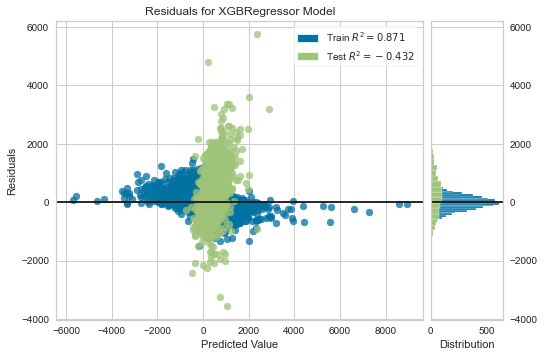

In [20]:
plot_model(xgb)

In [14]:
cat_final = finalize_model(cat)

In [15]:
predictions = predict_model(cat_final,data=test_data)

In [16]:
predictions

,permno,yyyymm,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,AgeIPO,AM,...,VolMkt,VolSD,VolumeTrend,XFIN,zerotrade,zerotradeAlt1,zerotradeAlt12,ticker,ret,Label
381,10107,201801,0.01,0.03,NaN,NaN,NaN,0.00,NaN,0.33,...,-0.05,-149.94,0.01,-0.06,0.00,0.00,0.00,MSFT,-86,227.79
382,10107,201802,0.01,0.03,NaN,NaN,NaN,0.00,NaN,0.33,...,-0.05,-150.91,0.01,-0.06,0.00,0.00,0.00,MSFT,-266,449.71
383,10107,201803,0.01,0.03,NaN,NaN,NaN,0.00,NaN,0.34,...,-0.06,-148.52,0.01,-0.06,0.00,0.00,0.00,MSFT,246,275.05
384,10107,201804,0.01,0.03,NaN,NaN,NaN,0.00,NaN,0.34,...,-0.06,-142.11,0.01,-0.06,0.00,0.00,0.00,MSFT,613,256.68
385,10107,201805,0.01,0.03,NaN,NaN,NaN,0.00,NaN,0.32,...,-0.06,-143.04,0.01,-0.06,0.00,0.00,0.00,MSFT,-23,488.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25905,92655,202007,0.00,0.02,NaN,NaN,NaN,NaN,NaN,0.61,...,-0.09,-29.78,-0.00,0.03,0.00,0.00,0.00,UNH,322,372.38
25906,92655,202008,0.00,0.02,NaN,NaN,NaN,NaN,NaN,0.59,...,-0.08,-29.61,-0.00,0.03,0.00,0.00,0.00,UNH,15,292.60
25907,92655,202009,0.00,0.02,NaN,NaN,NaN,NaN,NaN,0.59,...,-0.08,-29.57,-0.00,0.03,0.00,0.00,0.00,UNH,-212,304.26
25908,92655,202010,0.00,0.02,NaN,NaN,NaN,NaN,NaN,0.60,...,-0.08,-29.83,-0.00,0.03,0.00,0.00,0.00,UNH,1022,471.10
